Purpose of this notebook is

1) to predict the short and long term memorability of the videos using pre-extracted assorted features, as follows: Aesthetic features, C3D, Captions, ColorHistogram, HMP, HOG, InceptionV3, LRP, ORB.

We have considered HMP, C3D and Captions here.

2) to calculate the spearmann score of the models used in above task

As prediction of memorability is a regression problem, we have used following regression models of machine learning for this:

1) Linear regresssion

2) Decision Trees

3) K-NN

4) Ensemble models - random forests, voting regressor, gradient boost, adaboost

5) Neural Networks

The purpose of this was to compare all of them and use the best for test-set.

*Few points to be noted*

 - Basically, this is an attempt to implement whatever has been learnt since the start of the course.
 - Inspite of importing them initially, necessary libraries have been imported as per the requirement...in the middle of notebook.
 - Functions to read HMP and C3D features took too much time. This is why, extracted data has been saved as csv files

...

Following function has been taken from the assignment's tutorial. This is to calculate the Spearman's score.

In [0]:
def Get_score(Y_pred,Y_true):
    '''Calculate the Spearmann"s correlation coefficient'''
    Y_pred = np.squeeze(Y_pred)
    Y_true = np.squeeze(Y_true)
    if Y_pred.shape != Y_true.shape:
        print('Input shapes don\'t match!')
    else:
        if len(Y_pred.shape) == 1:
            Res = pd.DataFrame({'Y_true':Y_true,'Y_pred':Y_pred})
            score_mat = Res[['Y_true','Y_pred']].corr(method='spearman',min_periods=1)
            print('The Spearman\'s correlation coefficient is: %.3f' % score_mat.iloc[1][0])
        else:
            for ii in range(Y_pred.shape[1]):
                Get_score(Y_pred[:,ii],Y_true[:,ii])

*Below lines will load the data from my DCU google drive. I think, if somebody else is running, they will have to change the path*

In [6]:
from google.colab import drive
import os
drive.mount('/content/drive/')
os.chdir('/content/drive/My Drive/CA684_Assignment/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
#import necessary libraries
import pandas as pd
import numpy as np

**Loading Ground truth csv file**

In [0]:
gtPath ='./Dev-set/Ground-truth/'
dfGroundTruth = pd.read_csv(gtPath+'ground-truth.csv')

**Loading assorted video features**

below function has been referenced from the tutorial

In [0]:
# load labels and captions
def read_caps(fname):
    """Load the captions into a dataframe"""
    vn = []
    cap = []
    df = pd.DataFrame();
    with open(fname) as f:
        for line in f:
            pairs = line.split()
            vn.append(pairs[0])
            cap.append(pairs[1])
        df['video']=vn
        df['caption']=cap
    return df


# load the captions - dev set
cap_path = './Dev-set/Captions/dev-set_video-captions.txt'
df_captions=read_caps(cap_path)

below function is to read the HMP files

In [0]:
def readHMP(fname):
    """Scan HMP(Histogram of Motion Patterns) features from file"""
    with open(fname) as fileName:
        for eachLine in fileName:
            pairs=eachLine.split()
            #creating a temporary dictionary
            tempHMP = { int(p.split(':')[0]) : float(p.split(':')[1]) for p in pairs}
    # there are 6075 bins, fill zeros
    HMP = np.zeros(6075)
    for index in tempHMP.keys():
        HMP[index-1] = tempHMP[index]            
    return HMP

In [0]:
#creating a new dataframe
dfHMP_Dev = pd.DataFrame(columns = ['video', 'arrayInfo'])

#path
dirHMP_Dev = './Dev-set/HMP/'

for eachFile in os.listdir(dirHMP_Dev):
    if eachFile.endswith(".txt"):
        path = os.path.join(dirHMP_Dev, eachFile)
        arrayFile = readHMP(path)
        eachFile= eachFile.replace(".txt",".webm")
        dfHMP_Dev = dfHMP_Dev.append({'video': eachFile, 'arrayInfo': arrayFile}, ignore_index=True)
    else:
        break

In [0]:
#saving the dataframe
dfHMP_Dev.to_csv('/content/drive/My Drive/dfHMP_Dev.csv')

Below line to read the extracted features directly. This saves overall time.

*Below line will load the data from my DCU google drive. I think, if somebody else is running, they will have to change the path*

https://drive.google.com/open?id=1VKCh_yEMGwtLWkvw6Mo_dl6ywOvENkv-

above is the link for this CSV which can be open by anyone with DCU email id

In [0]:
dfHMP_Dev = pd.read_csv('/content/drive/My Drive/dfHMP_Dev.csv')

Below function will read C3D

In [0]:
import tqdm
from tqdm import tqdm_notebook as tqdm
from pathlib import Path
#from tqdm import tqdm.notebook.tqdm as tqdm

In [19]:
def readC3D(fname):
    """Scan vectors from file"""
    with open(fname) as file:
        for line in file:
            C3D =[float(item) for item in line.split()] # convert to float type, using default separator
    return C3D

dirC3D_Dev = Path('./Dev-set/C3D/')
#path
#dirC3D_Dev = './Dev-set/C3D/'

max_iterations = 6000
c3dDict ={}

for file in tqdm (list(dirC3D_Dev.glob('*.txt'))):
  key = file.with_suffix('.webm').name
  c3dDict[key] = readC3D(file)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  from ipykernel import kernelapp as app


In [0]:
dfC3D_Dev= pd.DataFrame(c3dDict).T
dfC3D_Dev=pd.DataFrame(dfC3D_Dev).rename_axis('video')
dfC3D_Dev.head(3)

In [0]:
#saving the dataframe in collab
dfC3D_Dev.to_csv('/content/drive/My Drive/dfC3D_Dev.csv')

Below line to read the extracted features directly. This saves overall time.

*Below line will load the data from my DCU google drive. I think, if somebody else is running, they will have to change the path*

https://drive.google.com/open?id=1ptJuFz18sWWfJQSnz8GAZ4sTVRryshTS

above is the link for this CSV which can be open by anyone with DCU email id

In [0]:
dfC3D_Dev = pd.read_csv('/content/drive/My Drive/dfC3D_Dev.csv')

**Data cleaning of Captions using count vectorizer and TF-IDF**

1. Below steps are for count vectorizer

In [12]:
dfCaptions_Dev = df_captions.merge(dfGroundTruth,on=["video"],how="inner")
dfCaptions_Dev.head(3)

,video,caption,short-term_memorability,nb_short-term_annotations,long-term_memorability,nb_long-term_annotations
0,video3.webm,blonde-woman-is-massaged-tilt-down,0.924,34,0.846,13
1,video4.webm,roulette-table-spinning-with-ball-in-closeup-shot,0.923,33,0.667,12
2,video6.webm,khr-gangsters,0.863,33,0.700,10


In [0]:
from sklearn.feature_extraction.text import CountVectorizer

In [0]:
#english stopwords will be removed from here
countVect=CountVectorizer(min_df=1, stop_words='english')

In [15]:
xCounts=countVect.fit_transform(dfCaptions_Dev['caption'])
print(xCounts.shape)

(6000, 5019)


In [0]:
xCounts=countVect.fit_transform(dfCaptions_Dev['caption'])

In [17]:
xCountsSeq=xCounts.toarray()
xCountsSeq

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [18]:
print(xCountsSeq[3])

[0 0 0 ... 0 0 0]


2. Below steps are for TF-IDF

reference of few function has been taken from the tutorial

In [19]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [0]:
#function to remove punctuation
def fixingPunctuation(text):
  fixedText="".join([word for word in text if word not in string.punctuation])  #it will discard all punctuation
  return fixedText

In [21]:
dfCaptions_Dev['updatedCaption']=dfCaptions_Dev['caption'].apply(lambda x: fixingPunctuation(x))
dfCaptions_Dev.head(3)

,video,caption,short-term_memorability,nb_short-term_annotations,long-term_memorability,nb_long-term_annotations,updatedCaption
0,video3.webm,blonde-woman-is-massaged-tilt-down,0.924,34,0.846,13,blondewomanismassagedtiltdown
1,video4.webm,roulette-table-spinning-with-ball-in-closeup-shot,0.923,33,0.667,12,roulettetablespinningwithballincloseupshot
2,video6.webm,khr-gangsters,0.863,33,0.700,10,khrgangsters


In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [0]:
vectorizer=TfidfVectorizer(max_features=1000)
#response=vectorizer.fit_transform(dfCaptions_Dev.updatedCaption).toarray()
#above line is commented because updatedCaptions didn't perform well. I will use captions now.
response=vectorizer.fit_transform(dfCaptions_Dev.caption).toarray()

In [41]:
dfCaptions_Dev['vectorizedCaption']=pd.Series(response.tolist())
print(dfCaptions_Dev.head(3))

         video  ...                                  vectorizedCaption
0  video3.webm  ...  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
1  video4.webm  ...  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
2  video6.webm  ...  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...

[3 rows x 8 columns]


In [42]:
list(dfCaptions_Dev.columns)

['video',
 'caption',
 'short-term_memorability',
 'nb_short-term_annotations',
 'long-term_memorability',
 'nb_long-term_annotations',
 'updatedCaption',
 'vectorizedCaption']

In [0]:
#dfCaptions_Dev_tfIdf = dfCaptions_Dev[['vectorizedCaption']].copy()
dfCaptions_Dev_tfIdf=pd.DataFrame(dfCaptions_Dev['vectorizedCaption'].tolist())
#dfCaptions_Dev_tfIdf['video']=pd.Series(dfCaptions_Dev['video'])

In [44]:
dfCaptions_Dev_tfIdf.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.201449,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.226147,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


*below lines are to merge captions(tf-idf) with HMP*

these lines are updated later after comapring the performance of count vectorizer for captions

In [267]:
dfDevCaptions_HMP=pd.DataFrame(dfCaptions_Dev['vectorizedCaption'].tolist())
dfDevCaptions_HMP['video']=pd.Series(dfCaptions_Dev['video'])
dfDevCaptions_HMP=pd.merge(dfDevCaptions_HMP, dfHMP_Dev, on = 'video')

print(dfDevCaptions_HMP.head(3))

     0    1  ...  long-term_memorability  nb_long-term_annotations
0  0.0  0.0  ...                   0.846                        13
1  0.0  0.0  ...                   0.667                        12
2  0.0  0.0  ...                   0.700                        10

[3 rows x 1107 columns]


In [0]:
dfDevCaptions_HMP_final = dfDevCaptions_HMP.drop(columns=['long-term_memorability', 'short-term_memorability', 'video', 'nb_long-term_annotations', 'nb_short-term_annotations'], axis=1)

In [273]:
dfDevCaptions_HMP_final.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.096647,0.004458,0.011840,0.000287,0.002195,0.002792,0.000018,0.003365,0.000061,0.000573,0.000273,0.000034,0.006737,0.000021,0.000098,0.000025,0.005768,2.990000e-06,0.000085,0.000607,0.000461,0.001189,0.000270,0.000127,0.000106,0.000154,0.000567,0.000020,0.000894,0.001079,0.001042,0.000161,0.000257,0.046617,0.000156,0.000006,0.000537,0.000339,0.008437,0.000470
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000372,0.000154,0.000148,0.000086,0.000267,0.000014,0.001430,0.004417,0.000064,0.000105,0.003129,0.000055,0.000061,0.000025,0.004283,0.000010,0.000062,2.903000e-05,0.000374,0.000139,0.741702,0.007178,0.000346,0.000104,0.000181,0.000052,0.004839,0.000078,0.042325,0.000623,0.000582,0.000393,0.000864,0.000947,0.000136,0.000007,0.000360,0.000159,0.001025,0.000020
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.876291,0.005509,0.008852,0.000399,0.000069,0.013166,0.000015,0.000044,0.000520,0.000046,0.000007,0.000024,0.010491,0.000475,0.000023,0.000006,0.005554,2.500000e-07,0.000057,0.000328,0.000149,0.001844,0.000008,0.000103,0.000030,0.000005,0.000179,0.000001,0.000006,0.000215,0.000224,0.000003,0.000031,0.002538,0.000104,0.000005,0.000064,0.005380,0.001027,0.001384


*below lines are to merge captions(tf-idf) with C3D*

these lines are updated later after comapring the performance of count vectorizer for captions

In [297]:
dfDevCaptions_C3D=pd.DataFrame(dfCaptions_Dev['vectorizedCaption'].tolist())
dfDevCaptions_C3D['video']=pd.Series(dfCaptions_Dev['video'])
dfDevCaptions_C3D=pd.merge(dfDevCaptions_C3D, dfC3D_Dev, on = 'video')

print(dfDevCaptions_C3D.head(3))

     0    1  ...  long-term_memorability  nb_long-term_annotations
0  0.0  0.0  ...                   0.846                        13
1  0.0  0.0  ...                   0.667                        12
2  0.0  0.0  ...                   0.700                        10

[3 rows x 1106 columns]


In [0]:
dfDevCaptions_C3D_final = dfDevCaptions_C3D.drop(columns=['long-term_memorability', 'short-term_memorability', 'video', 'nb_long-term_annotations', 'nb_short-term_annotations'], axis=1)

In [299]:
dfDevCaptions_C3D_final.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.096647,0.004458,0.011840,0.000287,0.002195,0.002792,0.000018,0.003365,0.000061,0.000573,0.000273,0.000034,0.006737,0.000021,0.000098,2.502000e-05,0.005768,2.990000e-06,0.000085,0.000607,0.000461,0.001189,0.000270,0.000127,0.000106,0.000154,0.000567,0.000020,0.000894,0.001079,0.001042,0.000161,0.000257,0.046617,0.000156,0.000006,0.000537,0.000339,0.008437,0.000470
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000372,0.000154,0.000148,0.000086,0.000267,0.000014,0.001430,0.004417,0.000064,0.000105,0.003129,0.000055,0.000061,0.000025,0.004283,1.032000e-05,0.000062,2.903000e-05,0.000374,0.000139,0.741702,0.007178,0.000346,0.000104,0.000181,0.000052,0.004839,0.000078,0.042325,0.000623,0.000582,0.000393,0.000864,0.000947,0.000136,0.000007,0.000360,0.000159,0.001025,0.000020
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.876291,0.005509,0.008852,0.000399,0.000069,0.013166,0.000015,0.000044,0.000520,0.000046,0.000007,0.000024,0.010491,0.000475,0.000023,5.590000e-06,0.005554,2.500000e-07,0.000057,0.000328,0.000149,0.001844,0.000008,0.000103,0.000030,0.000005,0.000179,0.000001,0.000006,0.000215,0.000224,0.000003,0.000031,0.002538,0.000104,0.000005,0.000064,0.005380,0.001027,0.001384
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.590434,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000009,0.000007,0.000005,0.000539,0.000035,0.000391,0.000021,0.000043,0.000010,0.000028,0.012471,0.006671,0.001187,0.000002,0.119488,5.600000e-07,0.000004,4.250000e-06,0.000040,0.000148,0.103989,0.058989,0.000002,0.000069,0.000004,0.000130,0.001182,0.000003,0.000006,0.000044,0.000046,0.000009,0.000023,0.000053,0.000048,0.000019,0.000001,0.000004,0.000380,0.000029
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000236,0.000046,0.000027,0.000203,0.010644,0.000252,0.000349,0.001776,0.000006,0.001443,0.000146,0.019003,0.000584,0.000027,0.000692,5.650000e-06,0.000403,2.894700e-04,0.000197,0.001254,0.005257,0.045808,0.000008,0.000296,0.003893,0.000318,0.000048,0.000018,0.000263,0.000026,0.000037,0.000690,0.000171,0.000231,0.000637,0.000040,0.000061,0.000075,0.000002,0.001323


**HMP and joining ground truth with it**

In [89]:
dfHMP_Dev = dfHMP_Dev.merge(dfGroundTruth,on=["video"],how="inner")
dfHMP_Dev.head(3)

,Unnamed: 0,video,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,...,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,short-term_memorability,nb_short-term_annotations,long-term_memorability,nb_long-term_annotations
0,0,video6632.webm,0.010858,0.010386,0.000000,0.000000e+00,0.000000e+00,0.000000,2.700000e-07,0.000000,1.000000e-08,3.400000e-07,8.000000e-08,1.000000e-08,0.000004,0.000105,0.000000,4.000000e-08,1.000000e-08,0.000000,0.000000,1.331800e-04,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,7.600000e-07,0.000000,9.800000e-07,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,6.000000e-08,0.000021,5.000000e-08,0.000000,1.000000e-08,3.000000e-08,...,0.000032,0.000001,0.000000,0.000000,1.000000e-08,2.500000e-07,0.000000e+00,0.000000,5.000000e-08,0.000000,1.000000e-08,1.000000e-08,4.200000e-07,0.000000e+00,3.000000e-08,2.000000e-08,0.000000,0.000000,0.000000,6.000000e-08,0.000000,0.000000,9.000000e-08,0.000000,0.000000e+00,1.100000e-07,1.400000e-07,0.00000,0.000000,1.700000e-07,0.000000,0.000000,1.000000e-08,1.300000e-06,2.600000e-06,8.000000e-08,0.884,31,0.900,10
1,1,video6634.webm,0.000200,0.000065,0.993807,2.000000e-07,4.700000e-07,0.000073,3.700000e-06,0.000337,6.710000e-06,2.290000e-06,6.380000e-06,7.340000e-06,0.000019,0.000007,0.000003,3.810000e-06,1.411000e-05,0.000001,0.000003,2.300000e-07,1.900000e-07,0.002938,5.200000e-07,9.200000e-07,1.136000e-05,0.000011,3.310400e-04,9.200000e-07,0.000022,8.000000e-08,0.000028,0.000013,5.778000e-05,0.000037,1.683000e-05,0.000007,3.990000e-06,8.030000e-06,...,0.000050,0.000138,0.000012,0.000007,4.100000e-07,5.440000e-06,3.400000e-07,0.000007,8.399000e-05,0.000004,3.970000e-06,5.900000e-07,1.285300e-04,8.800000e-07,2.228000e-05,1.105000e-05,0.000003,0.000015,0.000014,4.090000e-06,0.000003,0.000005,4.920000e-06,0.000005,6.400000e-07,2.372000e-05,6.610000e-06,0.00001,0.000002,5.800000e-06,0.000001,0.000001,1.170000e-05,1.500000e-07,8.300000e-07,1.060000e-04,0.743,33,0.727,11
2,2,video6633.webm,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000008,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.999985,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.00000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,7.120000e-06,0.804,33,0.727,11


In [0]:
dfHMP_DevFeatures = dfHMP_Dev.iloc[:,2:103].values

In [91]:
dfHMP_DevFeatures.shape

(6000, 101)

**HMP + C3D with ground truth**

Note: We are merging dfC3D_Dev because it doesn't have ground truth columns yet

In [92]:
dfDevHMP_C3D = dfC3D_Dev.merge(dfHMP_Dev,on=["video"],how="inner")
dfDevHMP_C3D.columns
dfDevHMP_C3D.head(3)

,video,0_x,1_x,2_x,3_x,4_x,5_x,6_x,7_x,8_x,9_x,10_x,11_x,12_x,13_x,14_x,15_x,16_x,17_x,18_x,19_x,20_x,21_x,22_x,23_x,24_x,25_x,26_x,27_x,28_x,29_x,30_x,31_x,32_x,33_x,34_x,35_x,36_x,37_x,38_x,...,65_y,66_y,67_y,68_y,69_y,70_y,71_y,72_y,73_y,74_y,75_y,76_y,77_y,78_y,79_y,80_y,81_y,82_y,83_y,84_y,85_y,86_y,87_y,88_y,89_y,90_y,91_y,92_y,93_y,94_y,95_y,96_y,97_y,98_y,99_y,100_y,short-term_memorability,nb_short-term_annotations,long-term_memorability,nb_long-term_annotations
0,video6632.webm,0.010858,0.010386,0.000000,0.000000e+00,0.000000e+00,0.000000,2.700000e-07,0.000000,1.000000e-08,3.400000e-07,8.000000e-08,1.000000e-08,0.000004,0.000105,0.000000,4.000000e-08,1.000000e-08,0.000000,0.000000,1.331800e-04,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,7.600000e-07,0.000000,9.800000e-07,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,6.000000e-08,0.000021,5.000000e-08,0.000000,1.000000e-08,3.000000e-08,2.000000e-08,...,0.000032,0.000001,0.000000,0.000000,1.000000e-08,2.500000e-07,0.000000e+00,0.000000,5.000000e-08,0.000000,1.000000e-08,1.000000e-08,4.200000e-07,0.000000e+00,3.000000e-08,2.000000e-08,0.000000,0.000000,0.000000,6.000000e-08,0.000000,0.000000,9.000000e-08,0.000000,0.000000e+00,1.100000e-07,1.400000e-07,0.00000,0.000000,1.700000e-07,0.000000,0.000000,1.000000e-08,1.300000e-06,2.600000e-06,8.000000e-08,0.884,31,0.900,10
1,video6634.webm,0.000200,0.000065,0.993807,2.000000e-07,4.700000e-07,0.000073,3.700000e-06,0.000337,6.710000e-06,2.290000e-06,6.380000e-06,7.340000e-06,0.000019,0.000007,0.000003,3.810000e-06,1.411000e-05,0.000001,0.000003,2.300000e-07,1.900000e-07,0.002938,5.200000e-07,9.200000e-07,1.136000e-05,0.000011,3.310400e-04,9.200000e-07,0.000022,8.000000e-08,0.000028,0.000013,5.778000e-05,0.000037,1.683000e-05,0.000007,3.990000e-06,8.030000e-06,1.450000e-06,...,0.000050,0.000138,0.000012,0.000007,4.100000e-07,5.440000e-06,3.400000e-07,0.000007,8.399000e-05,0.000004,3.970000e-06,5.900000e-07,1.285300e-04,8.800000e-07,2.228000e-05,1.105000e-05,0.000003,0.000015,0.000014,4.090000e-06,0.000003,0.000005,4.920000e-06,0.000005,6.400000e-07,2.372000e-05,6.610000e-06,0.00001,0.000002,5.800000e-06,0.000001,0.000001,1.170000e-05,1.500000e-07,8.300000e-07,1.060000e-04,0.743,33,0.727,11
2,video6633.webm,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000008,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.999985,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.00000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,7.120000e-06,0.804,33,0.727,11


In [0]:
dfDevHMP_C3D_DevFeatures = dfDevHMP_C3D.iloc[:,2:204].values

In [94]:
dfDevHMP_C3D_DevFeatures.shape

(6000, 202)

**C3D and joining groundTruth with it**

In [95]:
dfC3D_Dev = dfC3D_Dev.merge(dfGroundTruth,on=["video"],how="inner")
dfC3D_Dev.head(3)

,video,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,short-term_memorability,nb_short-term_annotations,long-term_memorability,nb_long-term_annotations
0,video6632.webm,0.010858,0.010386,0.000000,0.000000e+00,0.000000e+00,0.000000,2.700000e-07,0.000000,1.000000e-08,3.400000e-07,8.000000e-08,1.000000e-08,0.000004,0.000105,0.000000,4.000000e-08,1.000000e-08,0.000000,0.000000,1.331800e-04,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,7.600000e-07,0.000000,9.800000e-07,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,6.000000e-08,0.000021,5.000000e-08,0.000000,1.000000e-08,3.000000e-08,2.000000e-08,...,0.000032,0.000001,0.000000,0.000000,1.000000e-08,2.500000e-07,0.000000e+00,0.000000,5.000000e-08,0.000000,1.000000e-08,1.000000e-08,4.200000e-07,0.000000e+00,3.000000e-08,2.000000e-08,0.000000,0.000000,0.000000,6.000000e-08,0.000000,0.000000,9.000000e-08,0.000000,0.000000e+00,1.100000e-07,1.400000e-07,0.00000,0.000000,1.700000e-07,0.000000,0.000000,1.000000e-08,1.300000e-06,2.600000e-06,8.000000e-08,0.884,31,0.900,10
1,video6634.webm,0.000200,0.000065,0.993807,2.000000e-07,4.700000e-07,0.000073,3.700000e-06,0.000337,6.710000e-06,2.290000e-06,6.380000e-06,7.340000e-06,0.000019,0.000007,0.000003,3.810000e-06,1.411000e-05,0.000001,0.000003,2.300000e-07,1.900000e-07,0.002938,5.200000e-07,9.200000e-07,1.136000e-05,0.000011,3.310400e-04,9.200000e-07,0.000022,8.000000e-08,0.000028,0.000013,5.778000e-05,0.000037,1.683000e-05,0.000007,3.990000e-06,8.030000e-06,1.450000e-06,...,0.000050,0.000138,0.000012,0.000007,4.100000e-07,5.440000e-06,3.400000e-07,0.000007,8.399000e-05,0.000004,3.970000e-06,5.900000e-07,1.285300e-04,8.800000e-07,2.228000e-05,1.105000e-05,0.000003,0.000015,0.000014,4.090000e-06,0.000003,0.000005,4.920000e-06,0.000005,6.400000e-07,2.372000e-05,6.610000e-06,0.00001,0.000002,5.800000e-06,0.000001,0.000001,1.170000e-05,1.500000e-07,8.300000e-07,1.060000e-04,0.743,33,0.727,11
2,video6633.webm,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000008,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.999985,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.00000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,7.120000e-06,0.804,33,0.727,11


In [0]:
dfC3D_DevFeatures = dfC3D_Dev.iloc[:,1:102].values

In [97]:
dfC3D_DevFeatures.shape

(6000, 101)

**Working on C3D only**

In [0]:
X = dfC3D_DevFeatures
y = dfGroundTruth[['short-term_memorability','long-term_memorability']].values #these are our target columns

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [57]:
print('X_train ', X_train.shape)
print('X_test  ', X_test.shape)
print('Y_train ', y_train.shape)
print('Y_test  ', y_test.shape)

X_train  (4800, 101)
X_test   (1200, 101)
Y_train  (4800, 2)
Y_test   (1200, 2)


*Implementing regression models*

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [190]:
#linear regression
linearRegressor = LinearRegression()
linearRegressor.fit(X_train, y_train)
y_pred = linearRegressor.predict(X_test)
Get_score(y_pred, y_test)

The Spearman's correlation coefficient is: 0.004
The Spearman's correlation coefficient is: -0.008


value of n has been choosen by sqrt(6000) = 77.45 

https://www.quora.com/How-can-I-choose-the-best-K-in-KNN-K-nearest-neighbour-classification

In [197]:
knnRegressor = KNeighborsRegressor(n_neighbors = 77)
knnRegressor.fit(X_test, y_test)
y_pred = knnRegressor.predict(X_test)
Get_score(y_pred, y_test)

The Spearman's correlation coefficient is: 0.119
The Spearman's correlation coefficient is: 0.116


In [198]:
dtRegressor = DecisionTreeRegressor()
dtRegressor.fit(X_train, y_train)
y_pred = dtRegressor.predict(X_test)
Get_score(y_pred, y_test)

The Spearman's correlation coefficient is: 0.011
The Spearman's correlation coefficient is: 0.025


In [199]:
rfRegressor = RandomForestRegressor(n_estimators=100,random_state=45)
rfRegressor.fit(X_train,y_train)
y_pred = rfRegressor.predict(X_test)
Get_score(y_pred, y_test)

The Spearman's correlation coefficient is: 0.001
The Spearman's correlation coefficient is: 0.012


*For other ensemble and neural networking models*

link followed for ensembling:
https://www.analyticsvidhya.com/blog/2018/06/comprehensive-guide-for-ensemble-models/

In [0]:
y_short = dfGroundTruth[['short-term_memorability']].values
y_long = dfGroundTruth[['long-term_memorability']].values

# Splitting the dataset into the Training set and Test set
short_X_train,short_X_test,short_y_train,short_y_test = train_test_split(X,y_short,test_size=0.2,random_state=40)
long_X_train,long_X_test,long_y_train,long_y_test = train_test_split(X,y_long,test_size=0.2,random_state=40)

In [209]:
model1 = LinearRegression()
model2 = DecisionTreeRegressor(random_state=1)
model3 = KNeighborsRegressor(n_neighbors = 77)
model4 = RandomForestRegressor(n_estimators=100,random_state=45)
vRegressor = VotingRegressor(estimators=[('lr', model1), ('dt', model2), ('knn', model3), ('rf', model4)])

vRegressor.fit(short_X_train,short_y_train)
y_pred = vRegressor.predict(short_X_test)
Get_score(y_pred, short_y_test)

vRegressor.fit(long_X_train,long_y_train)
y_pred = vRegressor.predict(long_X_test)
Get_score(y_pred, long_y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_voting.py:406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The Spearman's correlation coefficient is: 0.006


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_voting.py:406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The Spearman's correlation coefficient is: 0.054


In [206]:
abRegressor = AdaBoostRegressor()
abRegressor.fit(short_X_train, short_y_train)
y_pred = abRegressor.predict(short_X_test)
Get_score(y_pred, short_y_test)

abRegressor = AdaBoostRegressor()
abRegressor.fit(long_X_train, long_y_train)
y_pred = abRegressor.predict(long_X_test)
Get_score(y_pred, long_y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The Spearman's correlation coefficient is: -0.047


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The Spearman's correlation coefficient is: 0.019


In [211]:
gbRegressor= GradientBoostingRegressor()

gbRegressor.fit(short_X_train,short_y_train)
y_pred = gbRegressor.predict(short_X_test)
Get_score(y_pred, short_y_test)

gbRegressor.fit(long_X_train,long_y_train)
y_pred = gbRegressor.predict(long_X_test)
Get_score(y_pred, long_y_test)


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The Spearman's correlation coefficient is: 0.013


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The Spearman's correlation coefficient is: 0.027


links followed for neural network:

https://stackoverflow.com/questions/49008074/how-to-create-a-neural-network-for-regression

https://keras.io/activations/

https://keras.io/optimizers/

In [30]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from tensorflow.keras import layers

Using TensorFlow backend.


In [0]:
sc = StandardScaler()
short_X_train = sc.fit_transform(short_X_train)
short_X_test = sc.transform(short_X_test)

long_X_train = sc.fit_transform(long_X_train)
long_X_test = sc.transform(long_X_test)

In [0]:
# Initialising
neuralNetModel = Sequential()

# Adding the input layer and first hidden layer
neuralNetModel.add(Dense(32, activation = 'relu', input_dim = 101))

# Adding second hidden layer
neuralNetModel.add(Dense(units = 32, activation = 'relu'))

# Adding third hidden layer
neuralNetModel.add(Dense(units = 32, activation = 'relu'))

# Adding output layer
neuralNetModel.add(Dense(units = 1))

In [0]:
neuralNetModel.compile(optimizer = 'adam',loss = 'mean_squared_error')

In [256]:
neuralNetModel.fit(short_X_train, short_y_train, batch_size = 10, epochs = 51)
neuralNetModel.fit(long_X_train, long_y_train, batch_size = 10, epochs = 51)

Epoch 1/51
4800/4800 [==============================] - 1s 244us/step - loss: 0.0076
Epoch 2/51
4800/4800 [==============================] - 1s 247us/step - loss: 0.0062
Epoch 3/51
4800/4800 [==============================] - 1s 242us/step - loss: 0.0059
Epoch 4/51
4800/4800 [==============================] - 1s 244us/step - loss: 0.0058
Epoch 5/51
4800/4800 [==============================] - 1s 245us/step - loss: 0.0057
Epoch 6/51
4800/4800 [==============================] - 1s 244us/step - loss: 0.0056
Epoch 7/51
4800/4800 [==============================] - 1s 247us/step - loss: 0.0055
Epoch 8/51
4800/4800 [==============================] - 1s 294us/step - loss: 0.0054
Epoch 9/51
4800/4800 [==============================] - 1s 248us/step - loss: 0.0054
Epoch 10/51
4800/4800 [==============================] - 1s 253us/step - loss: 0.0053
Epoch 11/51
4800/4800 [==============================] - 1s 254us/step - loss: 0.0053
Epoch 12/51
4800/4800 [==============================] - 1s 251

In [257]:
y_pred = model.predict(short_X_test)
Get_score(y_pred, short_y_test)

y_pred = model.predict(long_X_test)
Get_score(y_pred, long_y_test)

The Spearman's correlation coefficient is: 0.040
The Spearman's correlation coefficient is: 0.017


In [0]:
import matplotlib.pyplot as plt

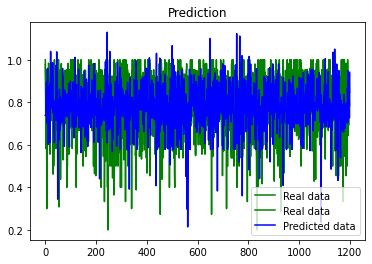

In [259]:
plt.plot(y_test, color = 'green', label = 'Real data')
plt.plot(y_pred, color = 'blue', label = 'Predicted data')
plt.title('Prediction')
plt.legend()
plt.show()

**Working on HMP only**

In [0]:
X = dfHMP_DevFeatures
y = dfGroundTruth[['short-term_memorability','long-term_memorability']].values #these are our target columns

In [0]:
#from sklearn.model_selection import train_test_split

In [0]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [64]:
print('X_train ', X_train.shape)
print('X_test  ', X_test.shape)
print('Y_train ', y_train.shape)
print('Y_test  ', y_test.shape)

X_train  (4800, 101)
X_test   (1200, 101)
Y_train  (4800, 2)
Y_test   (1200, 2)


In [65]:
#linear regression
linearRegressor = LinearRegression()
linearRegressor.fit(X_train, y_train)
y_pred = linearRegressor.predict(X_test)
Get_score(y_pred, y_test)

The Spearman's correlation coefficient is: 0.004
The Spearman's correlation coefficient is: -0.008


In [67]:
knnRegressor = KNeighborsRegressor(n_neighbors = 77)
knnRegressor.fit(X_test, y_test)
y_pred = knnRegressor.predict(X_test)
Get_score(y_pred, y_test)

The Spearman's correlation coefficient is: 0.119
The Spearman's correlation coefficient is: 0.116


In [68]:
dtRegressor = DecisionTreeRegressor()
dtRegressor.fit(X_train, y_train)
y_pred = dtRegressor.predict(X_test)
Get_score(y_pred, y_test)

The Spearman's correlation coefficient is: 0.018
The Spearman's correlation coefficient is: 0.012


In [69]:
rfRegressor = RandomForestRegressor(n_estimators=100,random_state=45)
rfRegressor.fit(X_train,y_train)
y_pred = rfRegressor.predict(X_test)
Get_score(y_pred, y_test)

The Spearman's correlation coefficient is: 0.001
The Spearman's correlation coefficient is: 0.012


*For other ensemble and neural networking models*

In [0]:
y_short = dfGroundTruth[['short-term_memorability']].values
y_long = dfGroundTruth[['long-term_memorability']].values

# Splitting the dataset into the Training set and Test set
short_X_train,short_X_test,short_y_train,short_y_test = train_test_split(X,y_short,test_size=0.2,random_state=40)
long_X_train,long_X_test,long_y_train,long_y_test = train_test_split(X,y_long,test_size=0.2,random_state=40)

In [75]:
model1 = LinearRegression()
model2 = DecisionTreeRegressor(random_state=1)
model3 = KNeighborsRegressor(n_neighbors = 77)
model4 = RandomForestRegressor(n_estimators=100,random_state=45)
vRegressor = VotingRegressor(estimators=[('lr', model1), ('dt', model2), ('knn', model3), ('rf', model4)])

vRegressor.fit(short_X_train,short_y_train)
y_pred = vRegressor.predict(short_X_test)
Get_score(y_pred, short_y_test)

vRegressor.fit(long_X_train,long_y_train)
y_pred = vRegressor.predict(long_X_test)
Get_score(y_pred, long_y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_voting.py:406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The Spearman's correlation coefficient is: 0.007


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_voting.py:406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The Spearman's correlation coefficient is: 0.051


In [76]:
abRegressor = AdaBoostRegressor()
abRegressor.fit(short_X_train, short_y_train)
y_pred = abRegressor.predict(short_X_test)
Get_score(y_pred, short_y_test)

abRegressor = AdaBoostRegressor()
abRegressor.fit(long_X_train, long_y_train)
y_pred = abRegressor.predict(long_X_test)
Get_score(y_pred, long_y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The Spearman's correlation coefficient is: -0.054


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The Spearman's correlation coefficient is: -0.015


In [77]:
gbRegressor= GradientBoostingRegressor()

gbRegressor.fit(short_X_train,short_y_train)
y_pred = gbRegressor.predict(short_X_test)
Get_score(y_pred, short_y_test)

gbRegressor.fit(long_X_train,long_y_train)
y_pred = gbRegressor.predict(long_X_test)
Get_score(y_pred, long_y_test)


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The Spearman's correlation coefficient is: 0.008


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The Spearman's correlation coefficient is: 0.028


In [0]:
sc = StandardScaler()
short_X_train = sc.fit_transform(short_X_train)
short_X_test = sc.transform(short_X_test)

long_X_train = sc.fit_transform(long_X_train)
long_X_test = sc.transform(long_X_test)

In [0]:
# Initialising
neuralNetModel = Sequential()

# Adding the input layer and first hidden layer
neuralNetModel.add(Dense(32, activation = 'relu', input_dim = 101))

# Adding second hidden layer
neuralNetModel.add(Dense(units = 32, activation = 'relu'))

# Adding third hidden layer
neuralNetModel.add(Dense(units = 32, activation = 'relu'))

# Adding output layer
neuralNetModel.add(Dense(units = 1))

In [0]:
neuralNetModel.compile(optimizer = 'adam',loss = 'mean_squared_error')

In [81]:
neuralNetModel.fit(short_X_train, short_y_train, batch_size = 10, epochs = 51)
neuralNetModel.fit(long_X_train, long_y_train, batch_size = 10, epochs = 51)

Epoch 1/51
4800/4800 [==============================] - 3s 628us/step - loss: 0.0968
Epoch 2/51
4800/4800 [==============================] - 1s 245us/step - loss: 0.0195
Epoch 3/51
4800/4800 [==============================] - 1s 271us/step - loss: 0.0158
Epoch 4/51
4800/4800 [==============================] - 1s 301us/step - loss: 0.0121
Epoch 5/51
4800/4800 [==============================] - 1s 289us/step - loss: 0.0095
Epoch 6/51
4800/4800 [==============================] - 1s 258us/step - loss: 0.0087
Epoch 7/51
4800/4800 [==============================] - 1s 299us/step - loss: 0.0103
Epoch 8/51
4800/4800 [==============================] - 1s 242us/step - loss: 0.0092
Epoch 9/51
4800/4800 [==============================] - 1s 246us/step - loss: 0.0082
Epoch 10/51
4800/4800 [==============================] - 1s 259us/step - loss: 0.0078
Epoch 11/51
4800/4800 [==============================] - 1s 264us/step - loss: 0.0069
Epoch 12/51
4800/4800 [==============================] - 1s 240

In [83]:
y_pred = neuralNetModel.predict(short_X_test)
Get_score(y_pred, short_y_test)

y_pred = neuralNetModel.predict(long_X_test)
Get_score(y_pred, long_y_test)

The Spearman's correlation coefficient is: 0.004
The Spearman's correlation coefficient is: -0.016


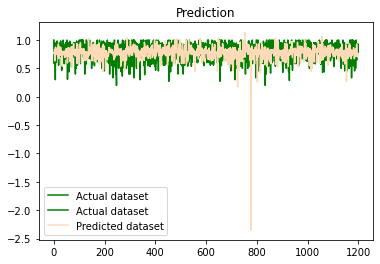

In [84]:
plt.plot(y_test, color = 'green', label = 'Actual dataset')
plt.plot(y_pred, color = 'peachpuff', label = 'Predicted dataset')
plt.title('Prediction')
plt.legend()
plt.show()

**Working on HMP + C3D**

In [0]:
X = dfDevHMP_C3D_DevFeatures
y = dfGroundTruth[['short-term_memorability','long-term_memorability']].values #these are our target columns

In [0]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [100]:
print('X_train ', X_train.shape)
print('X_test  ', X_test.shape)
print('Y_train ', y_train.shape)
print('Y_test  ', y_test.shape)

X_train  (4800, 202)
X_test   (1200, 202)
Y_train  (4800, 2)
Y_test   (1200, 2)


In [101]:
#linear regression
linearRegressor = LinearRegression()
linearRegressor.fit(X_train, y_train)
y_pred = linearRegressor.predict(X_test)
Get_score(y_pred, y_test)

The Spearman's correlation coefficient is: 0.005
The Spearman's correlation coefficient is: -0.006


In [105]:
knnRegressor = KNeighborsRegressor(n_neighbors = 77)
knnRegressor.fit(X_test, y_test)
y_pred = knnRegressor.predict(X_test)
Get_score(y_pred, y_test)

The Spearman's correlation coefficient is: 0.082
The Spearman's correlation coefficient is: 0.112


In [103]:
dtRegressor = DecisionTreeRegressor()
dtRegressor.fit(X_train, y_train)
y_pred = dtRegressor.predict(X_test)
Get_score(y_pred, y_test)

The Spearman's correlation coefficient is: -0.019
The Spearman's correlation coefficient is: 0.005


In [104]:
rfRegressor = RandomForestRegressor(n_estimators=100,random_state=45)
rfRegressor.fit(X_train,y_train)
y_pred = rfRegressor.predict(X_test)
Get_score(y_pred, y_test)

The Spearman's correlation coefficient is: 0.000
The Spearman's correlation coefficient is: 0.005


*For other ensemble and neural networking models*

In [0]:
y_short = dfGroundTruth[['short-term_memorability']].values
y_long = dfGroundTruth[['long-term_memorability']].values

In [0]:
# Splitting the dataset into the Training set and Test set
short_X_train,short_X_test,short_y_train,short_y_test = train_test_split(X,y_short,test_size=0.2,random_state=40)
long_X_train,long_X_test,long_y_train,long_y_test = train_test_split(X,y_long,test_size=0.2,random_state=40)

In [111]:
model1 = LinearRegression()
model2 = DecisionTreeRegressor(random_state=1)
model3 = KNeighborsRegressor(n_neighbors = 77)
model4 = RandomForestRegressor(n_estimators=100,random_state=45)
vRegressor = VotingRegressor(estimators=[('lr', model1), ('dt', model2), ('knn', model3), ('rf', model4)])

vRegressor.fit(short_X_train,short_y_train)
y_pred = vRegressor.predict(short_X_test)
Get_score(y_pred, short_y_test)

vRegressor.fit(long_X_train,long_y_train)
y_pred = vRegressor.predict(long_X_test)
Get_score(y_pred, long_y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_voting.py:406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The Spearman's correlation coefficient is: -0.009


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_voting.py:406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The Spearman's correlation coefficient is: 0.040


In [112]:
abRegressor = AdaBoostRegressor()
abRegressor.fit(short_X_train, short_y_train)
y_pred = abRegressor.predict(short_X_test)
Get_score(y_pred, short_y_test)

abRegressor = AdaBoostRegressor()
abRegressor.fit(long_X_train, long_y_train)
y_pred = abRegressor.predict(long_X_test)
Get_score(y_pred, long_y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The Spearman's correlation coefficient is: -0.058


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The Spearman's correlation coefficient is: 0.040


In [113]:
gbRegressor= GradientBoostingRegressor()

gbRegressor.fit(short_X_train,short_y_train)
y_pred = gbRegressor.predict(short_X_test)
Get_score(y_pred, short_y_test)

gbRegressor.fit(long_X_train,long_y_train)
y_pred = gbRegressor.predict(long_X_test)
Get_score(y_pred, long_y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The Spearman's correlation coefficient is: -0.004


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The Spearman's correlation coefficient is: 0.021


In [0]:
sc = StandardScaler()
short_X_train = sc.fit_transform(short_X_train)
short_X_test = sc.transform(short_X_test)

long_X_train = sc.fit_transform(long_X_train)
long_X_test = sc.transform(long_X_test)

In [0]:
# Initialising
neuralNetModel = Sequential()

# Adding the input layer and first hidden layer
neuralNetModel.add(Dense(32, activation = 'relu', input_dim = 202))

# Adding second hidden layer
neuralNetModel.add(Dense(units = 32, activation = 'relu'))

# Adding third hidden layer
neuralNetModel.add(Dense(units = 32, activation = 'relu'))

# Adding output layer
neuralNetModel.add(Dense(units = 1))

In [118]:
neuralNetModel.compile(optimizer = 'adam',loss = 'mean_squared_error')
neuralNetModel.fit(short_X_train, short_y_train, batch_size = 10, epochs = 51)
neuralNetModel.fit(long_X_train, long_y_train, batch_size = 10, epochs = 51)

Epoch 1/51
4800/4800 [==============================] - 1s 266us/step - loss: 0.0752
Epoch 2/51
4800/4800 [==============================] - 1s 238us/step - loss: 0.0146
Epoch 3/51
4800/4800 [==============================] - 1s 283us/step - loss: 0.0228
Epoch 4/51
4800/4800 [==============================] - 1s 244us/step - loss: 0.0111
Epoch 5/51
4800/4800 [==============================] - 1s 262us/step - loss: 0.0106
Epoch 6/51
4800/4800 [==============================] - 1s 283us/step - loss: 0.0076
Epoch 7/51
4800/4800 [==============================] - 1s 290us/step - loss: 0.0069
Epoch 8/51
4800/4800 [==============================] - 1s 290us/step - loss: 0.0069
Epoch 9/51
4800/4800 [==============================] - 1s 238us/step - loss: 0.0075
Epoch 10/51
4800/4800 [==============================] - 1s 280us/step - loss: 0.0066
Epoch 11/51
4800/4800 [==============================] - 1s 240us/step - loss: 0.0066
Epoch 12/51
4800/4800 [==============================] - 1s 234

In [119]:
y_pred = neuralNetModel.predict(short_X_test)
Get_score(y_pred, short_y_test)

The Spearman's correlation coefficient is: -0.037


In [120]:
y_pred = neuralNetModel.predict(long_X_test)
Get_score(y_pred, long_y_test)

The Spearman's correlation coefficient is: -0.029


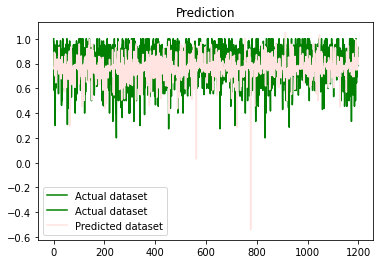

In [121]:
plt.plot(y_test, color = 'green', label = 'Actual dataset')
plt.plot(y_pred, color = 'mistyrose', label = 'Predicted dataset')
plt.title('Prediction')
plt.legend()
plt.show()

**Working on captions + count vectorizer**

In [0]:
X = xCountsSeq
y = dfGroundTruth[['short-term_memorability','long-term_memorability']].values #these are our target columns

In [0]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [165]:
print('X_train ', X_train.shape)
print('X_test  ', X_test.shape)
print('Y_train ', y_train.shape)
print('Y_test  ', y_test.shape)

X_train  (4800, 5019)
X_test   (1200, 5019)
Y_train  (4800, 2)
Y_test   (1200, 2)


In [166]:
#linear regression
linearRegressor = LinearRegression()
linearRegressor.fit(X_train, y_train)
y_pred = linearRegressor.predict(X_test)
Get_score(y_pred, y_test)

The Spearman's correlation coefficient is: 0.110
The Spearman's correlation coefficient is: 0.030


In [167]:
knnRegressor = KNeighborsRegressor(n_neighbors = 77)
knnRegressor.fit(X_test, y_test)
y_pred = knnRegressor.predict(X_test)
Get_score(y_pred, y_test)

The Spearman's correlation coefficient is: 0.402
The Spearman's correlation coefficient is: 0.231


In [168]:
dtRegressor = DecisionTreeRegressor()
dtRegressor.fit(X_train, y_train)
y_pred = dtRegressor.predict(X_test)
Get_score(y_pred, y_test)

The Spearman's correlation coefficient is: 0.267
The Spearman's correlation coefficient is: 0.110


In [169]:
rfRegressor = RandomForestRegressor(n_estimators=100,random_state=45)
rfRegressor.fit(X_train,y_train)
y_pred = rfRegressor.predict(X_test)
Get_score(y_pred, y_test)

The Spearman's correlation coefficient is: 0.396
The Spearman's correlation coefficient is: 0.172


*For other ensemble and neural networking models*

In [0]:
y_short = dfGroundTruth[['short-term_memorability']].values
y_long = dfGroundTruth[['long-term_memorability']].values

In [0]:
# Splitting the dataset into the Training set and Test set
short_X_train,short_X_test,short_y_train,short_y_test = train_test_split(X,y_short,test_size=0.2,random_state=40)
long_X_train,long_X_test,long_y_train,long_y_test = train_test_split(X,y_long,test_size=0.2,random_state=40)

In [172]:
model1 = LinearRegression()
model2 = DecisionTreeRegressor(random_state=1)
model3 = KNeighborsRegressor(n_neighbors = 77)
model4 = RandomForestRegressor(n_estimators=100,random_state=45)
vRegressor = VotingRegressor(estimators=[('lr', model1), ('dt', model2), ('knn', model3), ('rf', model4)])

vRegressor.fit(short_X_train,short_y_train)
y_pred = vRegressor.predict(short_X_test)
Get_score(y_pred, short_y_test)

vRegressor.fit(long_X_train,long_y_train)
y_pred = vRegressor.predict(long_X_test)
Get_score(y_pred, long_y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_voting.py:406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The Spearman's correlation coefficient is: 0.129


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_voting.py:406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The Spearman's correlation coefficient is: 0.075


In [173]:
abRegressor = AdaBoostRegressor()
abRegressor.fit(short_X_train, short_y_train)
y_pred = abRegressor.predict(short_X_test)
Get_score(y_pred, short_y_test)

abRegressor = AdaBoostRegressor()
abRegressor.fit(long_X_train, long_y_train)
y_pred = abRegressor.predict(long_X_test)
Get_score(y_pred, long_y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The Spearman's correlation coefficient is: 0.185


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The Spearman's correlation coefficient is: 0.120


In [174]:
gbRegressor= GradientBoostingRegressor()

gbRegressor.fit(short_X_train,short_y_train)
y_pred = gbRegressor.predict(short_X_test)
Get_score(y_pred, short_y_test)

gbRegressor.fit(long_X_train,long_y_train)
y_pred = gbRegressor.predict(long_X_test)
Get_score(y_pred, long_y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The Spearman's correlation coefficient is: 0.322


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The Spearman's correlation coefficient is: 0.170


In [0]:
sc = StandardScaler()
short_X_train = sc.fit_transform(short_X_train)
short_X_test = sc.transform(short_X_test)

long_X_train = sc.fit_transform(long_X_train)
long_X_test = sc.transform(long_X_test)

In [0]:
# Initialising
neuralNetModel = Sequential()

# Adding the input layer and first hidden layer
neuralNetModel.add(Dense(32, activation = 'relu', input_dim = 5019))

# Adding second hidden layer
neuralNetModel.add(Dense(units = 32, activation = 'relu'))

# Adding third hidden layer
neuralNetModel.add(Dense(units = 32, activation = 'relu'))

# Adding output layer
neuralNetModel.add(Dense(units = 1))

In [185]:
neuralNetModel.compile(optimizer = 'adam',loss = 'mean_squared_error')
neuralNetModel.fit(short_X_train, short_y_train, batch_size = 10, epochs = 101)
neuralNetModel.fit(long_X_train, long_y_train, batch_size = 10, epochs = 101)

Epoch 1/101
4800/4800 [==============================] - 1s 296us/step - loss: 0.0063
Epoch 2/101
4800/4800 [==============================] - 1s 265us/step - loss: 0.0038
Epoch 3/101
4800/4800 [==============================] - 1s 260us/step - loss: 0.0028
Epoch 4/101
4800/4800 [==============================] - 1s 261us/step - loss: 0.0022
Epoch 5/101
4800/4800 [==============================] - 1s 289us/step - loss: 0.0018
Epoch 6/101
4800/4800 [==============================] - 1s 275us/step - loss: 0.0016
Epoch 7/101
4800/4800 [==============================] - 1s 269us/step - loss: 0.0014
Epoch 8/101
4800/4800 [==============================] - 1s 288us/step - loss: 0.0013
Epoch 9/101
4800/4800 [==============================] - 1s 282us/step - loss: 0.0012
Epoch 10/101
4800/4800 [==============================] - 1s 252us/step - loss: 0.0012
Epoch 11/101
4800/4800 [==============================] - 1s 305us/step - loss: 0.0012
Epoch 12/101
4800/4800 [============================

In [186]:
y_pred = neuralNetModel.predict(short_X_test)
Get_score(y_pred, short_y_test)

y_pred = neuralNetModel.predict(long_X_test)
Get_score(y_pred, long_y_test)

The Spearman's correlation coefficient is: 0.172
The Spearman's correlation coefficient is: 0.164


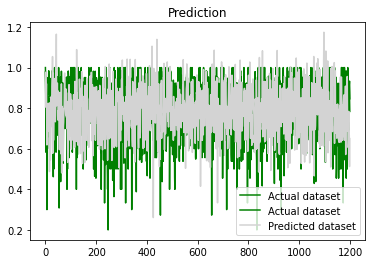

In [187]:
plt.plot(y_test, color = 'green', label = 'Actual dataset')
plt.plot(y_pred, color = 'lightgrey', label = 'Predicted dataset')
plt.title('Prediction')
plt.legend()
plt.show()

**Working on captions + tf-idf**

In [0]:
X = dfCaptions_Dev_tfIdf
y = dfGroundTruth[['short-term_memorability','long-term_memorability']].values #these are our target columns

In [0]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [47]:
print('X_train ', X_train.shape)
print('X_test  ', X_test.shape)
print('Y_train ', y_train.shape)
print('Y_test  ', y_test.shape)

X_train  (4800, 1000)
X_test   (1200, 1000)
Y_train  (4800, 2)
Y_test   (1200, 2)


In [48]:
#linear regression
linearRegressor = LinearRegression()
linearRegressor.fit(X_train, y_train)
y_pred = linearRegressor.predict(X_test)
Get_score(y_pred, y_test)

The Spearman's correlation coefficient is: 0.381
The Spearman's correlation coefficient is: 0.165


In [49]:
knnRegressor = KNeighborsRegressor(n_neighbors = 77)
knnRegressor.fit(X_test, y_test)
y_pred = knnRegressor.predict(X_test)
Get_score(y_pred, y_test)

The Spearman's correlation coefficient is: 0.371
The Spearman's correlation coefficient is: 0.209


In [50]:
dtRegressor = DecisionTreeRegressor()
dtRegressor.fit(X_train, y_train)
y_pred = dtRegressor.predict(X_test)
Get_score(y_pred, y_test)

The Spearman's correlation coefficient is: 0.283
The Spearman's correlation coefficient is: 0.093


In [51]:
rfRegressor = RandomForestRegressor(n_estimators=100,random_state=45)
rfRegressor.fit(X_train,y_train)
y_pred = rfRegressor.predict(X_test)
Get_score(y_pred, y_test)

The Spearman's correlation coefficient is: 0.406
The Spearman's correlation coefficient is: 0.142


*For other ensemble and neural networking models*

In [0]:
y_short = dfGroundTruth[['short-term_memorability']].values
y_long = dfGroundTruth[['long-term_memorability']].values

In [0]:
# Splitting the dataset into the Training set and Test set
short_X_train,short_X_test,short_y_train,short_y_test = train_test_split(X,y_short,test_size=0.2,random_state=40)
long_X_train,long_X_test,long_y_train,long_y_test = train_test_split(X,y_long,test_size=0.2,random_state=40)

In [252]:
model1 = LinearRegression()
model2 = DecisionTreeRegressor(random_state=1)
model3 = KNeighborsRegressor(n_neighbors = 77)
model4 = RandomForestRegressor(n_estimators=100,random_state=45)
vRegressor = VotingRegressor(estimators=[('lr', model1), ('dt', model2), ('knn', model3), ('rf', model4)])

vRegressor.fit(short_X_train,short_y_train)
y_pred = vRegressor.predict(short_X_test)
Get_score(y_pred, short_y_test)

vRegressor.fit(long_X_train,long_y_train)
y_pred = vRegressor.predict(long_X_test)
Get_score(y_pred, long_y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_voting.py:406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The Spearman's correlation coefficient is: 0.363


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_voting.py:406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The Spearman's correlation coefficient is: 0.155


In [253]:
abRegressor = AdaBoostRegressor()
abRegressor.fit(short_X_train, short_y_train)
y_pred = abRegressor.predict(short_X_test)
Get_score(y_pred, short_y_test)

abRegressor = AdaBoostRegressor()
abRegressor.fit(long_X_train, long_y_train)
y_pred = abRegressor.predict(long_X_test)
Get_score(y_pred, long_y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The Spearman's correlation coefficient is: 0.192


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The Spearman's correlation coefficient is: 0.144


In [254]:
gbRegressor= GradientBoostingRegressor()

gbRegressor.fit(short_X_train,short_y_train)
y_pred = gbRegressor.predict(short_X_test)
Get_score(y_pred, short_y_test)

gbRegressor.fit(long_X_train,long_y_train)
y_pred = gbRegressor.predict(long_X_test)
Get_score(y_pred, long_y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The Spearman's correlation coefficient is: 0.319


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The Spearman's correlation coefficient is: 0.164


In [0]:
sc = StandardScaler()
short_X_train = sc.fit_transform(short_X_train)
short_X_test = sc.transform(short_X_test)

long_X_train = sc.fit_transform(long_X_train)
long_X_test = sc.transform(long_X_test)

In [0]:
# Initialising
neuralNetModel = Sequential()

# Adding the input layer and first hidden layer
neuralNetModel.add(Dense(32, activation = 'relu', input_dim = 1000))

# Adding second hidden layer
neuralNetModel.add(Dense(units = 32, activation = 'relu'))

# Adding third hidden layer
neuralNetModel.add(Dense(units = 32, activation = 'relu'))

# Adding output layer
neuralNetModel.add(Dense(units = 1))

In [260]:
neuralNetModel.compile(optimizer = 'adam',loss = 'mean_squared_error')
neuralNetModel.fit(short_X_train, short_y_train, batch_size = 10, epochs = 51)
neuralNetModel.fit(long_X_train, long_y_train, batch_size = 10, epochs = 51)

Epoch 1/51
4800/4800 [==============================] - 1s 297us/step - loss: 0.0816
Epoch 2/51
4800/4800 [==============================] - 1s 272us/step - loss: 0.0116
Epoch 3/51
4800/4800 [==============================] - 1s 272us/step - loss: 0.0056
Epoch 4/51
4800/4800 [==============================] - 1s 293us/step - loss: 0.0042
Epoch 5/51
4800/4800 [==============================] - 1s 307us/step - loss: 0.0038
Epoch 6/51
4800/4800 [==============================] - 1s 308us/step - loss: 0.0038
Epoch 7/51
4800/4800 [==============================] - 1s 294us/step - loss: 0.0035
Epoch 8/51
4800/4800 [==============================] - 1s 267us/step - loss: 0.0035
Epoch 9/51
4800/4800 [==============================] - 1s 268us/step - loss: 0.0032
Epoch 10/51
4800/4800 [==============================] - 1s 262us/step - loss: 0.0031
Epoch 11/51
4800/4800 [==============================] - 1s 256us/step - loss: 0.0032
Epoch 12/51
4800/4800 [==============================] - 1s 264

In [261]:
y_pred = neuralNetModel.predict(short_X_test)
Get_score(y_pred, short_y_test)

y_pred = neuralNetModel.predict(long_X_test)
Get_score(y_pred, long_y_test)

The Spearman's correlation coefficient is: 0.183
The Spearman's correlation coefficient is: 0.106


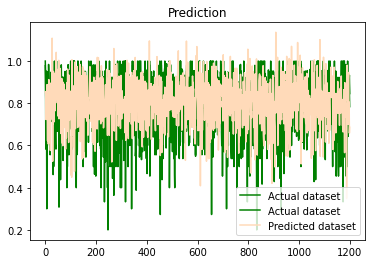

In [262]:
plt.plot(y_test, color = 'green', label = 'Actual dataset')
plt.plot(y_pred, color = 'peachpuff', label = 'Predicted dataset')
plt.title('Prediction')
plt.legend()
plt.show()

**Working on captions(tf-idf)+ HMP**

In [0]:
X = dfDevCaptions_HMP_final
y = dfGroundTruth[['short-term_memorability','long-term_memorability']].values #these are our target columns

In [0]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [277]:
print('X_train ', X_train.shape)
print('X_test  ', X_test.shape)
print('Y_train ', y_train.shape)
print('Y_test  ', y_test.shape)

X_train  (4800, 1102)
X_test   (1200, 1102)
Y_train  (4800, 2)
Y_test   (1200, 2)


In [278]:
#linear regression
linearRegressor = LinearRegression()
linearRegressor.fit(X_train, y_train)
y_pred = linearRegressor.predict(X_test)
Get_score(y_pred, y_test)

The Spearman's correlation coefficient is: 0.369
The Spearman's correlation coefficient is: 0.154


In [280]:
knnRegressor = KNeighborsRegressor(n_neighbors = 77)
knnRegressor.fit(X_test, y_test)
y_pred = knnRegressor.predict(X_test)
Get_score(y_pred, y_test)

The Spearman's correlation coefficient is: 0.090
The Spearman's correlation coefficient is: 0.108


In [281]:
dtRegressor = DecisionTreeRegressor()
dtRegressor.fit(X_train, y_train)
y_pred = dtRegressor.predict(X_test)
Get_score(y_pred, y_test)

The Spearman's correlation coefficient is: 0.157
The Spearman's correlation coefficient is: 0.017


In [282]:
rfRegressor = RandomForestRegressor(n_estimators=100,random_state=45)
rfRegressor.fit(X_train,y_train)
y_pred = rfRegressor.predict(X_test)
Get_score(y_pred, y_test)

The Spearman's correlation coefficient is: 0.354
The Spearman's correlation coefficient is: 0.136


*For other ensemble and neural networking models*

In [0]:
y_short = dfGroundTruth[['short-term_memorability']].values
y_long = dfGroundTruth[['long-term_memorability']].values

In [0]:
# Splitting the dataset into the Training set and Test set
short_X_train,short_X_test,short_y_train,short_y_test = train_test_split(X,y_short,test_size=0.2,random_state=40)
long_X_train,long_X_test,long_y_train,long_y_test = train_test_split(X,y_long,test_size=0.2,random_state=40)

In [286]:
model1 = LinearRegression()
model2 = DecisionTreeRegressor(random_state=1)
model3 = KNeighborsRegressor(n_neighbors = 77)
model4 = RandomForestRegressor(n_estimators=100,random_state=45)
vRegressor = VotingRegressor(estimators=[('lr', model1), ('dt', model2), ('knn', model3), ('rf', model4)])

vRegressor.fit(short_X_train,short_y_train)
y_pred = vRegressor.predict(short_X_test)
Get_score(y_pred, short_y_test)

vRegressor.fit(long_X_train,long_y_train)
y_pred = vRegressor.predict(long_X_test)
Get_score(y_pred, long_y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_voting.py:406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The Spearman's correlation coefficient is: 0.322


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_voting.py:406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The Spearman's correlation coefficient is: 0.140


In [287]:
abRegressor = AdaBoostRegressor()
abRegressor.fit(short_X_train, short_y_train)
y_pred = abRegressor.predict(short_X_test)
Get_score(y_pred, short_y_test)

abRegressor = AdaBoostRegressor()
abRegressor.fit(long_X_train, long_y_train)
y_pred = abRegressor.predict(long_X_test)
Get_score(y_pred, long_y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The Spearman's correlation coefficient is: 0.258


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The Spearman's correlation coefficient is: 0.089


In [288]:
gbRegressor= GradientBoostingRegressor()

gbRegressor.fit(short_X_train,short_y_train)
y_pred = gbRegressor.predict(short_X_test)
Get_score(y_pred, short_y_test)

gbRegressor.fit(long_X_train,long_y_train)
y_pred = gbRegressor.predict(long_X_test)
Get_score(y_pred, long_y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The Spearman's correlation coefficient is: 0.340


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The Spearman's correlation coefficient is: 0.170


In [0]:
sc = StandardScaler()
short_X_train = sc.fit_transform(short_X_train)
short_X_test = sc.transform(short_X_test)

long_X_train = sc.fit_transform(long_X_train)
long_X_test = sc.transform(long_X_test)

In [0]:
# Initialising
neuralNetModel = Sequential()

# Adding the input layer and first hidden layer
neuralNetModel.add(Dense(32, activation = 'relu', input_dim = 1102))

# Adding second hidden layer
neuralNetModel.add(Dense(units = 32, activation = 'relu'))

# Adding third hidden layer
neuralNetModel.add(Dense(units = 32, activation = 'relu'))

# Adding output layer
neuralNetModel.add(Dense(units = 1))

In [293]:
neuralNetModel.compile(optimizer = 'adam',loss = 'mean_squared_error')
neuralNetModel.fit(short_X_train, short_y_train, batch_size = 10, epochs = 51)
neuralNetModel.fit(long_X_train, long_y_train, batch_size = 10, epochs = 51)

Epoch 1/51
4800/4800 [==============================] - 1s 296us/step - loss: 0.0457
Epoch 2/51
4800/4800 [==============================] - 1s 266us/step - loss: 0.0083
Epoch 3/51
4800/4800 [==============================] - 1s 277us/step - loss: 0.0044
Epoch 4/51
4800/4800 [==============================] - 1s 266us/step - loss: 0.0033
Epoch 5/51
4800/4800 [==============================] - 1s 259us/step - loss: 0.0031
Epoch 6/51
4800/4800 [==============================] - 1s 268us/step - loss: 0.0032
Epoch 7/51
4800/4800 [==============================] - 1s 261us/step - loss: 0.0030
Epoch 8/51
4800/4800 [==============================] - 1s 264us/step - loss: 0.0030
Epoch 9/51
4800/4800 [==============================] - 1s 270us/step - loss: 0.0029
Epoch 10/51
4800/4800 [==============================] - 1s 273us/step - loss: 0.0028
Epoch 11/51
4800/4800 [==============================] - 1s 308us/step - loss: 0.0026
Epoch 12/51
4800/4800 [==============================] - 1s 295

In [294]:
y_pred = neuralNetModel.predict(short_X_test)
Get_score(y_pred, short_y_test)

y_pred = neuralNetModel.predict(long_X_test)
Get_score(y_pred, long_y_test)

The Spearman's correlation coefficient is: 0.140
The Spearman's correlation coefficient is: 0.103


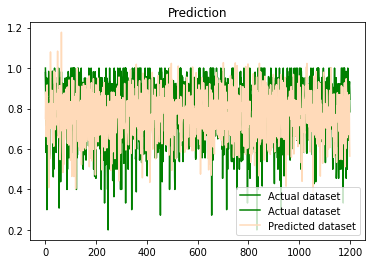

In [295]:
plt.plot(y_test, color = 'green', label = 'Actual dataset')
plt.plot(y_pred, color = 'peachpuff', label = 'Predicted dataset')
plt.title('Prediction')
plt.legend()
plt.show()

**Working on captions(tf-idf)+ C3D**

In [0]:
X = dfDevCaptions_C3D_final
y = dfGroundTruth[['short-term_memorability','long-term_memorability']].values #these are our target columns

In [0]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [304]:
print('X_train ', X_train.shape)
print('X_test  ', X_test.shape)
print('Y_train ', y_train.shape)
print('Y_test  ', y_test.shape)

X_train  (4800, 1101)
X_test   (1200, 1101)
Y_train  (4800, 2)
Y_test   (1200, 2)


In [305]:
#linear regression
linearRegressor = LinearRegression()
linearRegressor.fit(X_train, y_train)
y_pred = linearRegressor.predict(X_test)
Get_score(y_pred, y_test)

The Spearman's correlation coefficient is: 0.370
The Spearman's correlation coefficient is: 0.154


In [307]:
knnRegressor = KNeighborsRegressor(n_neighbors = 77)
knnRegressor.fit(X_test, y_test)
y_pred = knnRegressor.predict(X_test)
Get_score(y_pred, y_test)

The Spearman's correlation coefficient is: 0.354
The Spearman's correlation coefficient is: 0.145


In [308]:
dtRegressor = DecisionTreeRegressor()
dtRegressor.fit(X_train, y_train)
y_pred = dtRegressor.predict(X_test)
Get_score(y_pred, y_test)

The Spearman's correlation coefficient is: 0.122
The Spearman's correlation coefficient is: 0.029


In [309]:
rfRegressor = RandomForestRegressor(n_estimators=100,random_state=45)
rfRegressor.fit(X_train,y_train)
y_pred = rfRegressor.predict(X_test)
Get_score(y_pred, y_test)

The Spearman's correlation coefficient is: 0.351
The Spearman's correlation coefficient is: 0.140


*For other ensemble and neural networking models*

In [0]:
y_short = dfGroundTruth[['short-term_memorability']].values
y_long = dfGroundTruth[['long-term_memorability']].values

In [0]:
# Splitting the dataset into the Training set and Test set
short_X_train,short_X_test,short_y_train,short_y_test = train_test_split(X,y_short,test_size=0.2,random_state=40)
long_X_train,long_X_test,long_y_train,long_y_test = train_test_split(X,y_long,test_size=0.2,random_state=40)

In [312]:
model1 = LinearRegression()
model2 = DecisionTreeRegressor(random_state=1)
model3 = KNeighborsRegressor(n_neighbors = 77)
model4 = RandomForestRegressor(n_estimators=100,random_state=45)
vRegressor = VotingRegressor(estimators=[('lr', model1), ('dt', model2), ('knn', model3), ('rf', model4)])

vRegressor.fit(short_X_train,short_y_train)
y_pred = vRegressor.predict(short_X_test)
Get_score(y_pred, short_y_test)

vRegressor.fit(long_X_train,long_y_train)
y_pred = vRegressor.predict(long_X_test)
Get_score(y_pred, long_y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_voting.py:406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The Spearman's correlation coefficient is: 0.348


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_voting.py:406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The Spearman's correlation coefficient is: 0.176


In [313]:
abRegressor = AdaBoostRegressor()
abRegressor.fit(short_X_train, short_y_train)
y_pred = abRegressor.predict(short_X_test)
Get_score(y_pred, short_y_test)

abRegressor = AdaBoostRegressor()
abRegressor.fit(long_X_train, long_y_train)
y_pred = abRegressor.predict(long_X_test)
Get_score(y_pred, long_y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The Spearman's correlation coefficient is: 0.244


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The Spearman's correlation coefficient is: 0.098


In [314]:
gbRegressor= GradientBoostingRegressor()

gbRegressor.fit(short_X_train,short_y_train)
y_pred = gbRegressor.predict(short_X_test)
Get_score(y_pred, short_y_test)

gbRegressor.fit(long_X_train,long_y_train)
y_pred = gbRegressor.predict(long_X_test)
Get_score(y_pred, long_y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The Spearman's correlation coefficient is: 0.344


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The Spearman's correlation coefficient is: 0.171


In [0]:
sc = StandardScaler()
short_X_train = sc.fit_transform(short_X_train)
short_X_test = sc.transform(short_X_test)

long_X_train = sc.fit_transform(long_X_train)
long_X_test = sc.transform(long_X_test)

In [0]:
# Initialising
neuralNetModel = Sequential()

# Adding the input layer and first hidden layer
neuralNetModel.add(Dense(32, activation = 'relu', input_dim = 1101))

# Adding second hidden layer
neuralNetModel.add(Dense(units = 32, activation = 'relu'))

# Adding third hidden layer
neuralNetModel.add(Dense(units = 32, activation = 'relu'))

# Adding output layer
neuralNetModel.add(Dense(units = 1))

In [319]:
neuralNetModel.compile(optimizer = 'adam',loss = 'mean_squared_error')
neuralNetModel.fit(short_X_train, short_y_train, batch_size = 10, epochs = 51)
neuralNetModel.fit(long_X_train, long_y_train, batch_size = 10, epochs = 51)

Epoch 1/51
4800/4800 [==============================] - 2s 340us/step - loss: 0.1072
Epoch 2/51
4800/4800 [==============================] - 1s 287us/step - loss: 0.0163
Epoch 3/51
4800/4800 [==============================] - 1s 289us/step - loss: 0.0075
Epoch 4/51
4800/4800 [==============================] - 1s 293us/step - loss: 0.0051
Epoch 5/51
4800/4800 [==============================] - 1s 278us/step - loss: 0.0048
Epoch 6/51
4800/4800 [==============================] - 1s 277us/step - loss: 0.0039
Epoch 7/51
4800/4800 [==============================] - 1s 284us/step - loss: 0.0034
Epoch 8/51
4800/4800 [==============================] - 1s 298us/step - loss: 0.0033
Epoch 9/51
4800/4800 [==============================] - 1s 284us/step - loss: 0.0037
Epoch 10/51
4800/4800 [==============================] - 2s 339us/step - loss: 0.0033
Epoch 11/51
4800/4800 [==============================] - 1s 284us/step - loss: 0.0031
Epoch 12/51
4800/4800 [==============================] - 1s 278

In [320]:
y_pred = neuralNetModel.predict(short_X_test)
Get_score(y_pred, short_y_test)

y_pred = neuralNetModel.predict(long_X_test)
Get_score(y_pred, long_y_test)

The Spearman's correlation coefficient is: 0.193
The Spearman's correlation coefficient is: 0.144


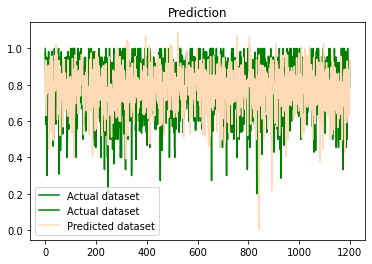

In [321]:
plt.plot(y_test, color = 'green', label = 'Actual dataset')
plt.plot(y_pred, color = 'peachpuff', label = 'Predicted dataset')
plt.title('Prediction')
plt.legend()
plt.show()

## **Prediction of Test Results**

We have considered whole captions(tf-idf) dev set as X

In [0]:
X = dfCaptions_Dev_tfIdf
y = dfGroundTruth[['short-term_memorability','long-term_memorability']].values

loading the test set data

In [0]:
gtPath ='./Test-set/Ground-truth_test/'
dfGroundTruth_test = pd.read_csv(gtPath+'ground_truth_template.csv')

cap_path = './Test-set/Captions_test/test-set-1_video-captions.txt'
df_captions_Test=read_caps(cap_path)

In [54]:
df_captions_Test.head(3)

,video,caption
0,video7494.webm,green-jeep-struggling-to-drive-over-huge-rocks
1,video7495.webm,hiking-woman-tourist-is-walking-forward-in-mou...
2,video7496.webm,close-up-of-african-american-doctors-hands-usi...


In [55]:
dfGroundTruth_test.head(3)

,video,short-term_memorability,nb_short-term_annotations,long-term_memorability,nb_long-term_annotations
0,7494,NaN,33,NaN,12
1,7495,NaN,34,NaN,10
2,7496,NaN,32,NaN,13


In [56]:
print(f'X: ({len(X)})')
print(f'y:{y.shape}')

X: (6000)
y:(6000, 2)


*TF-IDF on test captions*

In [0]:
vectorizer=TfidfVectorizer(max_features=1000)
response=vectorizer.fit_transform(df_captions_Test.caption).toarray()

In [59]:
df_captions_Test['vectorizedCaption']=pd.Series(response.tolist())
print(df_captions_Test.head(3))

            video  ...                                  vectorizedCaption
0  video7494.webm  ...  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
1  video7495.webm  ...  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
2  video7496.webm  ...  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...

[3 rows x 3 columns]


In [60]:
list(df_captions_Test.columns)

['video', 'caption', 'vectorizedCaption']

In [0]:
df_captions_Test_tfIdf=pd.DataFrame(df_captions_Test['vectorizedCaption'].tolist())

Training Random forest regressor

In [62]:
rfRegressor = RandomForestRegressor(n_estimators=100,random_state=45)
rfRegressor.fit(X,y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=45, verbose=0, warm_start=False)

In [0]:
testSet_pred = rfRegressor.predict(df_captions_Test_tfIdf)

In [0]:
finalPred = pd.DataFrame()

In [66]:
type(testSet_pred)

numpy.ndarray

In [0]:
finalPred['short-term'] = testSet_pred[:,0]

In [0]:
finalPred['long-term'] = testSet_pred[:,1]

In [69]:
finalPred.tail()  #tail shows the row number. We have predicted values of 2000 test set

,short-term,long-term
1995,0.856382,0.751422
1996,0.754677,0.734267
1997,0.829638,0.761398
1998,0.855205,0.722449
1999,0.851584,0.717439


In [0]:
finalPred.to_csv("/content/drive/My Drive/Raghvendra_Pratap_Singh_19210261_predictions.csv",index=False)